# SMS Spam Collection

to built a model to detect SMS spams

### Importing the datasets

In [45]:
# importing the necessaries
import seaborn as sns
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

In [46]:
df =  pd.read_csv('spam.csv', encoding='latin-1')

utf-8 code error usually comes when the range of numeric values exceeding 0 to 127, hence I have added "encoding = -1"

---> https://stackoverflow.com/questions/5552555/unicodedecodeerror-invalid-continuation-byte

In [47]:
df.head(10)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
5,spam,FreeMsg Hey there darling it's been 3 week's n...,NaN,NaN,NaN
6,ham,Even my brother is not like to speak with me. ...,NaN,NaN,NaN
7,ham,As per your request 'Melle Melle (Oru Minnamin...,NaN,NaN,NaN
8,spam,WINNER!! As a valued network customer you have...,NaN,NaN,NaN
9,spam,Had your mobile 11 months or more? U R entitle...,NaN,NaN,NaN


In [48]:
# checking for missing values
df.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [49]:
# let's now check the data types of each attribute
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [50]:
# Drop unnecessary columns if they exist
df = df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'])

In [51]:
# Rename columns for clarity
df.columns = ['label', 'message']

In [53]:
# Now we replace the missing values
df['message'].fillna('unknown', inplace=True)
df.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


### Some Visuals

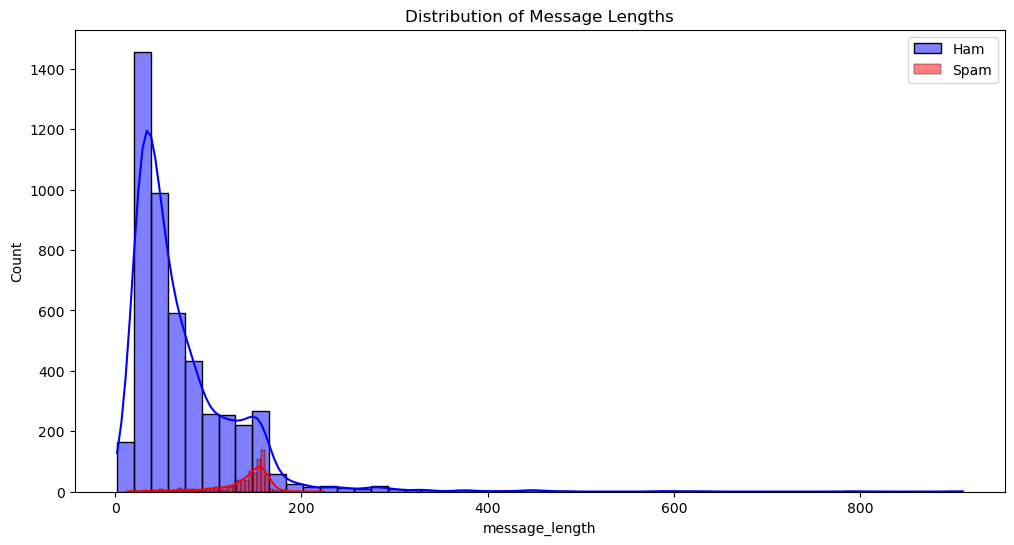

In [54]:
# Length of messages
df['message_length'] = df['message'].apply(len)

# Plot the distribution of message lengths
plt.figure(figsize=(12, 6))
sns.histplot(df[df['label'] == 'ham']['message_length'], bins=50, label='Ham', color='blue', kde=True)
sns.histplot(df[df['label'] == 'spam']['message_length'], bins=50, label='Spam', color='red', kde=True)
plt.legend()
plt.title('Distribution of Message Lengths')
plt.show()

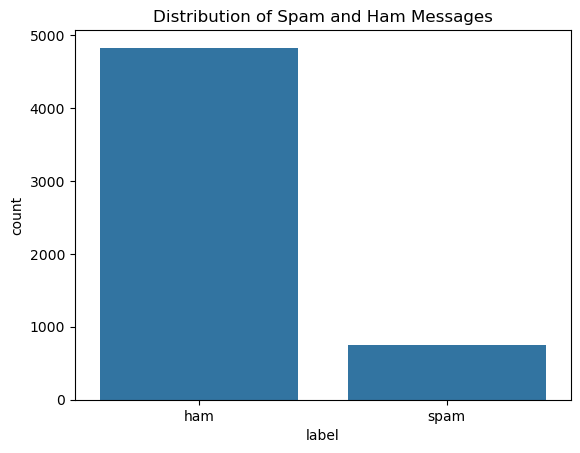

In [55]:
sns.countplot(x='label', data=df)
plt.title('Distribution of Spam and Ham Messages')
plt.show()

In [76]:
import pandas as pd
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import matplotlib.pyplot as plt
import seaborn as sns

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()

# Fill missing values in the 'message' column with a placeholder
df['message'].fillna('unknown', inplace=True)

# Preprocessing function to remove special characters and perform other preprocessing steps
def preprocess_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'\d+', '', text)  # Remove digits
    text = text.translate(str.maketrans('', '', string.punctuation))  # Remove punctuation
    text = re.sub(r'\W+', ' ', text)  # Remove special characters (non-word characters)
    text = text.strip()  # Remove leading/trailing whitespace
    tokens = text.split()  # Tokenization
    tokens = [word for word in tokens if word not in stop_words]  # Remove stop words
    tokens = [stemmer.stem(word) for word in tokens]  # Stemming
    return ' '.join(tokens)

# Apply the preprocessing function to the 'message' column
df['message'] = df['message'].apply(preprocess_text)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Removing the special characters

In [61]:
# importing...
import pandas as pd       
from nltk.tokenize import sent_tokenize, word_tokenize, RegexpTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import re

In [ ]:
sent_tokenize(df.lower())

In [ ]:
word_tokenize(spam.lower())

In [66]:
tokenizer = RegexpTokenizer(r'\w+')

In [ ]:
spam_tokens = tokenizer.tokenize(spam.lower())

In [ ]:
print(spam_tokens)

### Model Training

In [73]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Convert text data into TF-IDF features
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(df['message'])
y = df['label']

### Model Evaluation

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label='spam')
recall = recall_score(y_test, y_pred, pos_label='spam')
f1 = f1_score(y_test, y_pred, pos_label='spam')

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

### Hyperparameter Tuning 

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'C': [0.1, 1, 10, 100],
    'solver': ['liblinear', 'saga']
}

# Perform grid search
grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Best parameters
print(f'Best Parameters: {grid_search.best_params_}')


### Evaluation of the Model

In [ ]:
# Evaluate the best model
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)

# Evaluate the best model
accuracy_best = accuracy_score(y_test, y_pred_best)
precision_best = precision_score(y_test, y_pred_best, pos_label='spam')
recall_best = recall_score(y_test, y_pred_best, pos_label='spam')
f1_best = f1_score(y_test, y_pred_best, pos_label='spam')

print(f'Best Model Accuracy: {accuracy_best}')
print(f'Best Model Precision: {precision_best}')
print(f'Best Model Recall: {recall_best}')
print(f'Best Model F1 Score: {f1_best}')

# Plot confusion matrix for the best model
conf_matrix_best = confusion_matrix(y_test, y_pred_best)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_best, annot=True, fmt='d', cmap='Blues', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Best Model)')
plt.show()
